In [2]:
!apt-get install -y poppler-utils         # only for linux envorment

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (268 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124788 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 21.4 MB/s eta 0:00:00


In [4]:
!pip install spacy

In [5]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
!pip install nltk

In [2]:
!pip install pdf2image

In [3]:
!pip install pdfminer.six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 23.9 MB/s eta 0:00:00


In [1]:
import os
from pdfminer.high_level import extract_text
from pdf2image import convert_from_path
import easyocr
import cv2
import nltk
import seaborn as sns
from matplotlib import pyplot as plt

# Path to PDF

In [2]:
PDF_PATH = 'DATA/pic_jd.pdf'
OUTPUT_DIR = 'output_images'
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
# Step 1: Try to extract text using pdfminer.six
extracted_text = extract_text(PDF_PATH)

In [4]:
if extracted_text.strip():  # Check if there is any extracted text
    pass
else:
    print("No text found, proceeding with OCR...")
    # Step 2: Convert PDF pages to images using pdf2image for OCR
    image_paths = []
    pages = convert_from_path(PDF_PATH, dpi=300)  # Converts each page of the PDF to an image at a resolution of 300 DPI (dots per inch)

    for i, page in enumerate(pages):
        image_path = os.path.join(OUTPUT_DIR, f'page_{i + 1}.jpeg')
        page.save(image_path, 'JPEG')  # Save each page as JPEG
        image_paths.append(image_path)

    # Initialize EasyOCR reader  without  gpu  make true or remove the line
    reader = easyocr.Reader(['en'], gpu=False)

No text found, proceeding with OCR...


Using CPU. Note: This module is much faster with a GPU.


# Process each image and extract text using OCR

In [ ]:
final_detected_text = ""
if(extracted_text.strip()):
    final_detected_text = "".join(extracted_text)
else :
    all_detected_text = []  # Store text from all pages
    for image_path in image_paths:
        # Read the image
        img = cv2.imread(image_path)

        # Preprocess the image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Binarization
        denoised = cv2.medianBlur(binary, 3)  # Noise removal using median blur

        # Perform OCR on the preprocessed image
        result = reader.readtext(denoised)

        detected_text = []  # Text for the current page
        font = cv2.FONT_HERSHEY_SIMPLEX
        spacer = 100

        # Draw boxes and extract text
        for detection in result:
            # Convert coordinates to integers
            top_left = tuple(map(int, detection[0][0]))
            bottom_right = tuple(map(int, detection[0][2]))
            text = detection[1]  # Extract detected text

            # Append detected text to the list
            detected_text.append(text)

            # Draw rectangle and put text
            img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
            img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
            spacer += 15

        # Save detected text for the current page
        all_detected_text.append("\n".join(detected_text))

        # Display the image with detected text
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Page {image_paths.index(image_path) + 1}")
        plt.show()
        # all_detected_text.append("\n".join(detected_text))
        final_detected_text = "".join(all_detected_text)


# Combine all detected text into a single string

In [ ]:
# all_detected_text.append("\n".join(detected_text))
# final_detected_text = "\n\n".join(all_detected_text)

# Print the final detected text

In [ ]:
print("Final Detected Text from OCR:")
print(final_detected_text)

# Now extraction important details

In [30]:
import spacy

nlp = spacy.load("en_core_web_sm")
skill_path = 'DATA/skills.jsonl'

In [31]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [32]:
doc = nlp("My name is Adnan Nazir and i am working on NLP and python project")
doc.ents

(Adnan Nazir, NLP, python)

# clean our data

In [9]:
from spacy.lang.en.stop_words import STOP_WORDS
import re

def preprocessing(sentence):
    stopwords = list(STOP_WORDS)
     # Remove unwanted characters: ., -, |, •, etc.
    sentence = re.sub(r"[.,\-|•]", " ", sentence)
    # Remove extra whitespace
    sentence = re.sub(r"\s+", " ", sentence).strip()
    # Tokenize and process with spaCy
    doc = nlp(sentence)
    clean_tokens = []

    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SYM' and \
           token.pos_ != 'SPACE':
            clean_tokens.append(token.lemma_.lower().strip())

    return " ".join(clean_tokens)

In [ ]:
preprocess_text = preprocessing(final_detected_text)
preprocess_text

'data scientist arlington virginia usa updated 26/11/2024 be look work forefront machine learning ai would excited apply cut edge generative ai algorithm solve real world problem significant impact the aws industries team aws help aws customer implement generative ai solution realize transformational business opportunity aws customer strategic industry vertical this team data scientist engineer architect work step step customer build bespoke solution harness power generative ai the team help customer imagine scope use case create great value business select train fine tune right model define path navigate technical business challenge develop proof concept build application launch solution scale the aws industries team provide guidance implement good practice apply generative ai responsibly cost efficiently you work directly customer innovate fast pace organization contribute game change project technology you design run experiment research new algorithm find new way optimize risk profi

# Extracting skills

In [33]:
def get_skills(text):
  doc = nlp(text)

  skills = []

  for ent in doc.ents:
    if ent.label_ == 'SKILL':
      skills.append(ent.text)

  return list(set(skills))

In [34]:
op_skills = get_skills(preprocess_text)
set(op_skills)

NameError: name 'preprocess_text' is not defined

# Extract adjectives and adverbs

In [1]:
import nltk
from nltk.corpus import words
nltk.download('words')
valid_words = set(words.words())

[nltk_data] Downloading package words to C:\Users\Adnan
[nltk_data]     Nazir\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
def get_adjectives(text):
    doc = nlp(text)

    # Extract adjectives
    doc = nlp(text)
    adjectives = []

    for token in doc:
        # Check if the token's POS is 'ADJ' (adjective)
        if token.pos_ == "ADJ":
            lemma = token.lemma_.lower()
            # Only include valid English words
            if lemma in valid_words:
                adjectives.append(lemma)

    return adjectives

In [3]:
def get_adverbs(text):
    doc = nlp(text)

    # Extract adverbs
    adverbs = [
        token.lemma_.lower()
        for token in doc
        if token.pos_ == "ADV" and token.lemma_.lower() in valid_words
    ]

    return adverbs

In [ ]:
adjectives = get_adjectives(preprocess_text)
adverbs = get_adverbs(preprocess_text)

In [ ]:
adjectives

['forefront',
 'generative',
 'real',
 'significant',
 'generative',
 'strategic',
 'great',
 'fine',
 'right',
 'technical',
 'proof',
 'good',
 'generative',
 'fast',
 'new',
 'new',
 'capable',
 'key',
 'generative',
 'real',
 'deep',
 'good',
 'technical',
 'diverse',
 'diverse',
 'traditional',
 'alternative',
 'cloud',
 'successful',
 'global',
 'robust',
 'strive',
 'cloud',
 'inclusive',
 'curious',
 'ongoing']

In [ ]:
adverbs

['responsibly',
 'efficiently',
 'directly',
 'directly',
 'even',
 'broadly',
 'here']

# visualize

In [13]:
from spacy import displacy

In [ ]:
doc = nlp(preprocess_text)

In [ ]:
displacy.render(doc , style = 'ent')

# Loading the DATA set

In [17]:
! pip install datasets

In [16]:
from datasets import load_dataset

dataset = load_dataset("cnamuangtoun/resume-job-description-fit")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv:   0%|          | 0.00/53.4M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/15.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6241 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1759 [00:00<?, ? examples/s]

In [18]:
dataset["train"]

Dataset({
    features: ['resume_text', 'job_description_text', 'label'],
    num_rows: 6241
})

In [19]:
dataset["test"]

Dataset({
    features: ['resume_text', 'job_description_text', 'label'],
    num_rows: 1759
})

In [ ]:
resume_data_train = dataset["train"]

# Convert to Pandas DataFrame
import pandas as pd
df = resume_data_train.to_pandas()

In [ ]:
df.head()

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit


In [ ]:
#resuma type
print(df["resume_text"][0])

SummaryHighly motivated Sales Associate with extensive customer service and sales experience. Outgoing sales professional with track record of driving increased sales, improving buying experience and elevating company profile with target market.
Highlights-Soft Skills: Public Speaking, Public Relations, Team Building, Project Management, Procedure writing, Staff Supervision and Management, Ability to interface with professionals on all levels. Accomplishments, Honors, and Activities -Board of Directors Member for the Food Bank of Corpus Christi from November 2010 to April 2013. -Held Life Insurance License -Basketball Official (Referee) High School Varsity Level.
ExperienceAccountant,08/2014-05/2015Aspirus–Owen,WI,Perform daily and routine accounting functions for two main companies and five small royalty companies. Responsibilities include but are not limited to the following: Accounts Payable, Accounts Receivable, Manage and reconcile funds for multiple banks accounts, Payroll, Perfo

In [ ]:
# job discription type
print(df["job_description_text"][0])

Net2Source Inc. is an award-winning total workforce solutions company recognized by Staffing Industry Analysts for our accelerated growth of 300% in the last 3 years with over 5500+ employees globally, with over 30+ locations in the US and global operations in 32 countries. We believe in providing staffing solutions to address the current talent gap  Right Talent  Right Time  Right Place  Right Price and acting as a Career Coach to our consultants.  
Role: Basel Business AnalystLocation: Washington, D.C.Work Mode: HybridHire Type: 6+ Month Contract (extendable)
JD: Role Specific Experience: 6+ years of relevant technical and business work experience The Candidates who have worked on Basel related projects in Credit risks or at least are aware of credit risk.  Banking & Financial domain experience, along with knowledge of risk management, familiarity with concepts of finance and accounting  Proficiency in MS Excel  Experience in defining and implementing technology solutions for a major

In [ ]:
# types of lables
df["label"].unique()

array(['No Fit', 'Potential Fit', 'Good Fit'], dtype=object)

# Applying preprocessing and important info extraction on all resumes and jds

In [ ]:
df["pre_resume"]= df["resume_text"].apply(preprocessing)

In [ ]:
df["pre_jd"]= df["job_description_text"].apply(preprocessing)

In [ ]:
df.head()

,resume_text,job_description_text,label,pre_resume,pre_jd
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit,summaryhighly motivate sale associate extensiv...,net2source inc. award win total workforce solu...
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit,professional summarycurrently work caterpillar...,at salas obrien tell client engineer impact th...
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit,summaryi start construction career june 2017 j...,schweitzer engineering laboratories sel infras...
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit,summarycertified electrical foremanwith thirte...,mizick miller & company inc. look dynamic indi...
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit,summarywith extensive experience business requ...,life capgemini capgemini support aspect change...


# Creating Featuers

**skills Feature extraction**

In [ ]:
df['resume_skills'] = df['pre_resume'].apply(get_skills)

In [ ]:
df['jd_skills'] = df['pre_jd'].apply(get_skills)

In [ ]:
df.head()

,resume_text,job_description_text,label,pre_resume,pre_jd,resume_skills,jd_skills
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit,summaryhighly motivate sale associate extensiv...,net2source inc. award win total workforce solu...,"[windows, business, accounting, project manage...","[business, finance, accounting, mode, specific..."
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit,professional summarycurrently work caterpillar...,at salas obrien tell client engineer impact th...,"[business, workload, electrical engineering, p...","[business, finance, play, electrical engineeri..."
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit,summaryi start construction career june 2017 j...,schweitzer engineering laboratories sel infras...,"[business, play, material, component, diagram,...","[interaction, engineering, box, specification,..."
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit,summarycertified electrical foremanwith thirte...,mizick miller & company inc. look dynamic indi...,"[medium, controls, component, diagram, softwar...","[business, box, accounting]"
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit,summarywith extensive experience business requ...,life capgemini capgemini support aspect change...,"[monitoring, help desk, computer program, diag...","[ai, engineering, software engineering, design..."


**Doing same process for adverbs and adjectives**

In [ ]:
df['resume_adj'] = df['resume_text'].apply(get_adjectives)

In [ ]:
df['resume_adv'] = df['resume_text'].apply(get_adverbs)

In [ ]:
df['jd_adj']     = df['job_description_text'].apply(get_adjectives)

In [ ]:
df['jd_adv']     = df['job_description_text'].apply(get_adverbs)

In [ ]:
df.head()

,resume_text,job_description_text,label,pre_resume,pre_jd,resume_skills,jd_skills,resume_adj,resume_adv,jd_adj,jd_adv
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit,summaryhighly motivate sale associate extensiv...,net2source inc. award win total workforce solu...,"[windows, business, accounting, project manage...","[business, finance, accounting, mode, specific...","[extensive, outgoing, professional, daily, rou...","[more, also, annually, closely]","[total, accelerated, last, global, current, re...","[globally, mostly, well, also, more, more, mor..."
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit,professional summarycurrently work caterpillar...,at salas obrien tell client engineer impact th...,"[business, workload, electrical engineering, p...","[business, finance, play, electrical engineeri...","[active, several, technical, willing, familiar...","[most, highly, directly, personally, safely]","[much, inspiring, sustainable, long, amazing, ...","[just, as, also, truly, here, as, well, here, ..."
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit,summaryi start construction career june 2017 j...,schweitzer engineering laboratories sel infras...,"[business, play, material, component, diagram,...","[interaction, engineering, box, specification,...","[full, invaluable, electrical, related, knowle...","[consistently, highly, more, fully, fully, mor...","[talented, fascinating, rewarding, white, blac...","[most, typically, as, well]"
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit,summarycertified electrical foremanwith thirte...,mizick miller & company inc. look dynamic indi...,"[medium, controls, component, diagram, softwar...","[business, box, accounting]","[electrical, commercial, industrial, valuable,...","[highly, successfully, successfully, successfu...","[dynamic, great, right, strong, oral, equivale...","[rapidly, fast, excellent, only]"
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit,summarywith extensive experience business requ...,life capgemini capgemini support aspect change...,"[monitoring, help desk, computer program, diag...","[ai, engineering, software engineering, design...","[extensive, industry, professional, technical,...","[also, also, outside, prior, well, more, also,...","[eligible, flexible, dental, mental, financial...","[well, well, ultimately, no, long, strongly, t..."


**Saving the dataset so we dont have to do these things again**

In [ ]:
# df.to_pickle("processed_resumes.pkl")
# print("DataFrame saved as processed_resumes.pkl")

NameError: name 'df' is not defined

# Loading the dataset with skills column and preprocessed resumes and jds and adjectives and adverbs column

In [58]:
import pandas as pd
df = pd.read_pickle("processed_resumes.pkl")
print("Preprocessed DataFrame 'df' loaded from processed_resumes.pkl")

Preprocessed DataFrame 'df' loaded from processed_resumes.pkl


In [5]:
df.head()

,resume_text,job_description_text,label,pre_resume,pre_jd,resume_skills,jd_skills,resume_adj,resume_adv,jd_adj,jd_adv
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit,summaryhighly motivate sale associate extensiv...,net2source inc. award win total workforce solu...,"[windows, business, accounting, project manage...","[business, finance, accounting, mode, specific...","[extensive, outgoing, professional, daily, rou...","[more, also, annually, closely]","[total, accelerated, last, global, current, re...","[globally, mostly, well, also, more, more, mor..."
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit,professional summarycurrently work caterpillar...,at salas obrien tell client engineer impact th...,"[business, workload, electrical engineering, p...","[business, finance, play, electrical engineeri...","[active, several, technical, willing, familiar...","[most, highly, directly, personally, safely]","[much, inspiring, sustainable, long, amazing, ...","[just, as, also, truly, here, as, well, here, ..."
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit,summaryi start construction career june 2017 j...,schweitzer engineering laboratories sel infras...,"[business, play, material, component, diagram,...","[interaction, engineering, box, specification,...","[full, invaluable, electrical, related, knowle...","[consistently, highly, more, fully, fully, mor...","[talented, fascinating, rewarding, white, blac...","[most, typically, as, well]"
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit,summarycertified electrical foremanwith thirte...,mizick miller & company inc. look dynamic indi...,"[medium, controls, component, diagram, softwar...","[business, box, accounting]","[electrical, commercial, industrial, valuable,...","[highly, successfully, successfully, successfu...","[dynamic, great, right, strong, oral, equivale...","[rapidly, fast, excellent, only]"
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit,summarywith extensive experience business requ...,life capgemini capgemini support aspect change...,"[monitoring, help desk, computer program, diag...","[ai, engineering, software engineering, design...","[extensive, industry, professional, technical,...","[also, also, outside, prior, well, more, also,...","[eligible, flexible, dental, mental, financial...","[well, well, ultimately, no, long, strongly, t..."


In [6]:
df.columns

Index(['resume_text', 'job_description_text', 'label', 'pre_resume', 'pre_jd',
       'resume_skills', 'jd_skills', 'resume_adj', 'resume_adv', 'jd_adj',
       'jd_adv'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   resume_text           6241 non-null   object
 1   job_description_text  6241 non-null   object
 2   label                 6241 non-null   object
 3   pre_resume            6241 non-null   object
 4   pre_jd                6241 non-null   object
 5   resume_skills         6241 non-null   object
 6   jd_skills             6241 non-null   object
 7   resume_adj            6241 non-null   object
 8   resume_adv            6241 non-null   object
 9   jd_adj                6241 non-null   object
 10  jd_adv                6241 non-null   object
dtypes: object(11)
memory usage: 536.5+ KB


In [ ]:
df.describe()

,resume_text,job_description_text,label,pre_resume,pre_jd,resume_skills,jd_skills,resume_adj,resume_adv,jd_adj,jd_adv
count,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241
unique,642,280,3,642,280,604,260,604,545,278,248
top,SummaryFinancial Accountant specializing in fi...,Calling all innovators find your future at Fi...,No Fit,summaryfinancial accountant specialize financi...,call innovator find future fiserv be fiserv gl...,"[business, certificate, finance, accounting, r...","[cloud, business, amp, deployment, software, c...","[financial, private, public, adept, quick, fin...",[],"[global, financial, mobile, global, successful...",[]
freq,71,111,3143,71,111,71,152,71,360,111,480


In [ ]:
df.iloc[0]

resume_text             SummaryHighly motivated Sales Associate with e...
job_description_text    Net2Source Inc. is an award-winning total work...
label                                                              No Fit
pre_resume              summaryhighly motivate sale associate extensiv...
pre_jd                  net2source inc. award win total workforce solu...
resume_skills           [windows, business, accounting, project manage...
jd_skills               [business, finance, accounting, mode, specific...
resume_adj              [extensive, outgoing, professional, daily, rou...
resume_adv                                [more, also, annually, closely]
jd_adj                  [total, accelerated, last, global, current, re...
jd_adv                  [globally, mostly, well, also, more, more, mor...
Name: 0, dtype: object

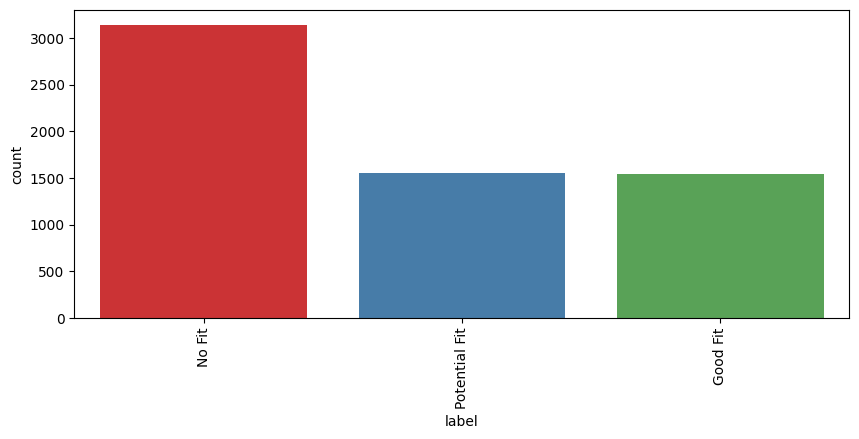

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x= 'label', data=df ,hue = 'label', palette = 'Set1')
plt.xticks(rotation=90)
plt.show();

**remove reduntant terms from columns**

In [63]:
def make_unq(list1):
    return list(set(list1))

In [64]:
df['resume_adj'] = df['resume_adj'].apply(make_unq)
df['resume_adv'] = df['resume_adv'].apply(make_unq)
df['jd_adj']     = df['jd_adj'].apply(make_unq)
df['jd_adv']     = df['jd_adj'].apply(make_unq)

# Function to calculate Jaccard similarity between columns

In [65]:
# Function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1)*len(set2)
    return intersection / union if union else 0

In [66]:
def calculate_jaccard_for_columns(df, col1, col2):
    similarities = []
    for index, row in df.iterrows():
        # Convert the columns to sets of words (assuming they are strings)
        set1 = set(row[col1])
        set2 = set(row[col2])

        # Calculate Jaccard similarity
        similarity = jaccard_similarity(set1, set2)
        similarities.append(similarity)

    return similarities

**Example usage: Calculate Jaccard similarity between 'resume_skills' and 'jd_skills'**

In [67]:
df['jaccard_skills'] = calculate_jaccard_for_columns(df, 'resume_skills', 'jd_skills')

**Similarly, calculate for other pairs of columns**

In [68]:
df['jaccard_adj'] = calculate_jaccard_for_columns(df, 'resume_adj', 'jd_adj')

In [69]:
df['jaccard_adv'] = calculate_jaccard_for_columns(df, 'resume_adv', 'jd_adv')

In [70]:
df.head()

,resume_text,job_description_text,label,pre_resume,pre_jd,resume_skills,jd_skills,resume_adj,resume_adv,jd_adj,jd_adv,jaccard_skills,jaccard_adj,jaccard_adv
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit,summaryhighly motivate sale associate extensiv...,net2source inc. award win total workforce solu...,"[windows, business, accounting, project manage...","[business, finance, accounting, mode, specific...","[strategic, accurate, new, professional, stand...","[more, closely, annually, also]","[consecutive, fit, aware, strategic, creative,...","[consecutive, fit, creative, aware, strategic,...",0.041667,0.004204,0.000000
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit,professional summarycurrently work caterpillar...,at salas obrien tell client engineer impact th...,"[business, workload, electrical engineering, p...","[business, finance, play, electrical engineeri...","[established, active, strategic, high, new, me...","[personally, safely, highly, directly, most]","[unique, much, lasting, high, academic, profes...","[unique, much, lasting, high, academic, profes...",0.029762,0.002467,0.000000
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit,summaryi start construction career june 2017 j...,schweitzer engineering laboratories sel infras...,"[business, play, material, component, diagram,...","[interaction, engineering, box, specification,...","[strict, high, accurate, new, professional, st...","[more, ahead, outside, consistently, cheerfull...","[dental, corporate, competitive, white, great,...","[dental, corporate, competitive, white, great,...",0.012500,0.001923,0.002222
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit,summarycertified electrical foremanwith thirte...,mizick miller & company inc. look dynamic indi...,"[medium, controls, component, diagram, softwar...","[business, box, accounting]","[valuable, consecutive, high, possible, commer...","[successfully, highly]","[right, flexible, successful, strict, able, dy...","[right, flexible, successful, strict, able, dy...",0.000000,0.002262,0.000000
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit,summarywith extensive experience business requ...,life capgemini capgemini support aspect change...,"[monitoring, help desk, computer program, diag...","[ai, engineering, software engineering, design...","[legacy, outside, accurate, new, professional,...","[more, outside, prior, well, over, also]","[dental, variable, high, innovative, strong, w...","[dental, variable, high, innovative, strong, w...",0.011765,0.003395,0.002778


In [71]:
df.iloc[:,11:].describe()

,jaccard_skills,jaccard_adj,jaccard_adv
count,6241.000000,6241.000000,6241.000000
mean,0.022280,0.004998,0.000732
std,0.026646,0.004429,0.003705
min,0.000000,0.000000,0.000000
25%,0.007937,0.002660,0.000000
50%,0.013410,0.004329,0.000000
75%,0.025210,0.006494,0.000000
max,0.333333,0.083333,0.125000


In [ ]:
len(df[df['jaccard_adv'] == 0])         # problem

5627

In [ ]:
len(df[df['jaccard_adj'] == 0])

772

In [ ]:
len(df[df['jaccard_skills'] == 0])

679

#Now repeating the same process for Test set

In [ ]:
resume_data_test = dataset["test"]

# Convert to Pandas DataFrame
import pandas as pd
test_df = resume_data_test.to_pandas()

In [21]:
test_df.head()

,resume_text,job_description_text,label
0,Summary7+ years of experience as a BI develope...,Key Responsibilities:Create intricate wiring n...,No Fit
1,Professional BackgroundAnalyst versed in data ...,Personal development and becoming the best you...,No Fit
2,Executive ProfileDedicated professional with t...,"Location: Tampa, FL\nExp: 7-10 Yrs\nSPOC: Tush...",No Fit
3,"Summarytyee\nHighlightsMicrosoft Excel, Word, ...","Primary Location: Melbourne, Florida\nV-Soft C...",No Fit
4,SummaryEIT certified Engineer and ASTQB Certif...,At Oregon Specialty Group the Accounting & Pay...,No Fit


**Applying preprocessing and important info extraction on all resumes and jds in the test set**

In [22]:
test_df["pre_resume"]= test_df["resume_text"].apply(preprocessing)

In [25]:
test_df["pre_jd"]= test_df["job_description_text"].apply(preprocessing)

**Creating Featuers**

In [38]:
test_df['resume_skills'] = test_df['pre_resume'].apply(get_skills)

In [39]:
test_df['jd_skills'] = test_df['pre_jd'].apply(get_skills)

**Doing same process for adverbs and adjectives**

In [43]:
test_df['resume_adj'] = test_df['resume_text'].apply(get_adjectives)

In [44]:
test_df['resume_adv'] = test_df['resume_text'].apply(get_adverbs)

In [45]:
test_df['jd_adj']     = test_df['job_description_text'].apply(get_adjectives)

In [46]:
test_df['jd_adv']     = test_df['job_description_text'].apply(get_adverbs)

In [47]:
test_df.head()

,resume_text,job_description_text,label,pre_resume,pre_jd,resume_skills,jd_skills,resume_adj,resume_adv,jd_adj,jd_adv
0,Summary7+ years of experience as a BI develope...,Key Responsibilities:Create intricate wiring n...,No Fit,summary7 + year experience bi developer prove ...,key responsibility create intricate wiring net...,"[testing, analytics, query optimization, data ...","[component, interaction, manufacturing enginee...","[related, valuable, various, dynamic, agile, i...","[primarily, also, also, most, high]","[intricate, electrical, seamless, comprehensiv...","[regularly, directly, fast]"
1,Professional BackgroundAnalyst versed in data ...,Personal development and becoming the best you...,No Fit,professional backgroundanalyst verse data anal...,personal development good growth explore new s...,"[testing, business, crystal, server, data anal...","[software, testing, business, engineering, des...","[complex, high, actuarial, other, analytic, di...","[as, well, effectively, daily, weekly, daily]","[personal, good, new, necessary, personal, pro...","[all, ever, highly, directly, fully, consisten..."
2,Executive ProfileDedicated professional with t...,"Location: Tampa, FL\nExp: 7-10 Yrs\nSPOC: Tush...",No Fit,executive profilededicated professional accomp...,location tampa fl exp 7 10 yrs spoc tushar ksh...,"[business, play, accounting, compliance, resea...","[javascript, component, business, certificatio...","[professional, accomplished, organizational, m...","[independently, successfully, extensively, sol...","[angular, global, digital, digital, digital, m...","[above, nearly, most, above, quickly, above, s..."
3,"Summarytyee\nHighlightsMicrosoft Excel, Word, ...","Primary Location: Melbourne, Florida\nV-Soft C...",No Fit,summarytyee highlightsmicrosoft excel word out...,primary location melbourne florida v soft cons...,"[business, box, analytics, documentation, mark...","[testing, software engineering, engineering, c...","[daily, weekly, monthly, previous, monthly, mo...",[daily],"[related, experienced, cloud, native, driven, ...","[currently, effectively, well, frequently, exc..."
4,SummaryEIT certified Engineer and ASTQB Certif...,At Oregon Specialty Group the Accounting & Pay...,No Fit,summaryeit certify engineer astqb certified qa...,at oregon specialty group accounting & payroll...,"[testing, engineering, library, software, crys...","[software, business, accounting, compliance, d...","[extensive, different, thorough, professional,...","[highly, successfully, highly, daily, effectiv...","[crucial, internal, financial, applicable, acc...","[currently, also, generally, especially]"


**Saving the dataset so we dont have to do these things again**

In [65]:
test_df.to_pickle("test_set.pkl")
print("DataFrame saved as test_set.pkl")

DataFrame saved as test_set.pkl


# Loading the test dataset with skills column and preprocessed resumes and jds and adjectives and adverbs column

In [46]:
import pandas as pd
test_df = pd.read_pickle("test_set.pkl")
print("Preprocessed test DataFrame 'test_df' loaded from test_set.pkl")

Preprocessed test DataFrame 'test_df' loaded from test_set.pkl


**Remove redunt terms**

In [51]:
test_df['resume_adj'] = test_df['resume_adj'].apply(make_unq)
test_df['resume_adv'] = test_df['resume_adv'].apply(make_unq)
test_df['jd_adj']     = test_df['jd_adj'].apply(make_unq)
test_df['jd_adv']     = test_df['jd_adj'].apply(make_unq)

**Example usage: Calculate Jaccard similarity between 'resume_skills' and 'jd_skills'**

In [52]:
test_df['jaccard_skills'] = calculate_jaccard_for_columns(test_df, 'resume_skills', 'jd_skills')

**Similarly, calculate for other pairs of columns**

In [53]:
test_df['jaccard_adj'] = calculate_jaccard_for_columns(test_df, 'resume_adj', 'jd_adj')

In [54]:
test_df['jaccard_adv'] = calculate_jaccard_for_columns(test_df, 'resume_adv', 'jd_adv')

In [55]:
test_df.head()

,resume_text,job_description_text,label,pre_resume,pre_jd,resume_skills,jd_skills,resume_adj,resume_adv,jd_adj,jd_adv,jaccard_skills,jaccard_adj,jaccard_adv
0,Summary7+ years of experience as a BI develope...,Key Responsibilities:Create intricate wiring n...,No Fit,summary7 + year experience bi developer prove ...,key responsibility create intricate wiring net...,"[testing, analytics, query optimization, data ...","[component, interaction, manufacturing enginee...","[valuable, active, ambitious, new, internal, s...","[primarily, also, most, high]","[seamless, vital, high, detailed, strong, mech...","[seamless, vital, high, detailed, strong, mech...",0.004310,0.004115,0.009259
1,Professional BackgroundAnalyst versed in data ...,Personal development and becoming the best you...,No Fit,professional backgroundanalyst verse data anal...,personal development good growth explore new s...,"[testing, business, crystal, server, data anal...","[software, testing, business, engineering, des...","[external, registration, high, managerial, new...","[weekly, effectively, as, well, daily]","[innovative, appropriate, intelligent, federal...","[innovative, appropriate, intelligent, federal...",0.009050,0.002152,0.002439
2,Executive ProfileDedicated professional with t...,"Location: Tampa, FL\nExp: 7-10 Yrs\nSPOC: Tush...",No Fit,executive profilededicated professional accomp...,location tampa fl exp 7 10 yrs spoc tushar ksh...,"[business, play, accounting, compliance, resea...","[javascript, component, business, certificatio...","[prestigious, sure, high, new, mutable, profes...","[extensively, successfully, solely, independen...","[dental, innovative, fide, federal, competitiv...","[dental, innovative, fide, federal, competitiv...",0.010417,0.001913,0.000000
3,"Summarytyee\nHighlightsMicrosoft Excel, Word, ...","Primary Location: Melbourne, Florida\nV-Soft C...",No Fit,summarytyee highlightsmicrosoft excel word out...,primary location melbourne florida v soft cons...,"[business, box, analytics, documentation, mark...","[testing, software engineering, engineering, c...","[valuable, afterschool, weekly, various, good,...",[daily],"[strategic, accurate, architectural, specific,...","[strategic, accurate, architectural, specific,...",0.008772,0.003151,0.000000
4,SummaryEIT certified Engineer and ASTQB Certif...,At Oregon Specialty Group the Accounting & Pay...,No Fit,summaryeit certify engineer astqb certified qa...,at oregon specialty group accounting & payroll...,"[testing, engineering, library, software, crys...","[software, business, accounting, compliance, d...","[unique, exploratory, high, detailed, specific...","[more, accurately, effectively, as, together, ...","[big, high, accurate, critical, appropriate, i...","[big, high, accurate, critical, appropriate, i...",0.009615,0.002964,0.000000


In [56]:
test_df.iloc[:,11:].describe()

,jaccard_skills,jaccard_adj,jaccard_adv
count,1759.000000,1759.000000,1759.000000
mean,0.019039,0.004223,0.000551
std,0.020195,0.003665,0.002551
min,0.000000,0.000000,0.000000
25%,0.008621,0.002124,0.000000
50%,0.013333,0.003695,0.000000
75%,0.022222,0.005571,0.000000
max,0.166667,0.037037,0.058824


In [72]:
df.iloc[:,11:].describe()

,jaccard_skills,jaccard_adj,jaccard_adv
count,6241.000000,6241.000000,6241.000000
mean,0.022280,0.004998,0.000732
std,0.026646,0.004429,0.003705
min,0.000000,0.000000,0.000000
25%,0.007937,0.002660,0.000000
50%,0.013410,0.004329,0.000000
75%,0.025210,0.006494,0.000000
max,0.333333,0.083333,0.125000


# Model traing 

In [73]:
df.columns

Index(['resume_text', 'job_description_text', 'label', 'pre_resume', 'pre_jd',
       'resume_skills', 'jd_skills', 'resume_adj', 'resume_adv', 'jd_adj',
       'jd_adv', 'jaccard_skills', 'jaccard_adj', 'jaccard_adv'],
      dtype='object')

In [74]:
train = df[['jaccard_skills', 'jaccard_adj', 'jaccard_adv','label']]

In [75]:
test  = test_df[['jaccard_skills', 'jaccard_adj', 'jaccard_adv','label']]

In [76]:
train.head()

,jaccard_skills,jaccard_adj,jaccard_adv,label
0,0.041667,0.004204,0.000000,No Fit
1,0.029762,0.002467,0.000000,No Fit
2,0.012500,0.001923,0.002222,No Fit
3,0.000000,0.002262,0.000000,No Fit
4,0.011765,0.003395,0.002778,No Fit


In [77]:
test.head()

,jaccard_skills,jaccard_adj,jaccard_adv,label
0,0.004310,0.004115,0.009259,No Fit
1,0.009050,0.002152,0.002439,No Fit
2,0.010417,0.001913,0.000000,No Fit
3,0.008772,0.003151,0.000000,No Fit
4,0.009615,0.002964,0.000000,No Fit


In [78]:
import pandas as pd
train.to_pickle("train.pkl")
test.to_pickle("test.pkl")

# Dont go above this 

In [16]:
import pandas as pd
train = pd.read_pickle("train.pkl")

In [17]:
test = pd.read_pickle("test.pkl")

In [18]:
train.head()

,jaccard_skills,jaccard_adj,jaccard_adv,label
0,0.041667,0.004204,0.000000,No Fit
1,0.029762,0.002467,0.000000,No Fit
2,0.012500,0.001923,0.002222,No Fit
3,0.000000,0.002262,0.000000,No Fit
4,0.011765,0.003395,0.002778,No Fit


In [19]:
test.head()

,jaccard_skills,jaccard_adj,jaccard_adv,label
0,0.004310,0.004115,0.009259,No Fit
1,0.009050,0.002152,0.002439,No Fit
2,0.010417,0.001913,0.000000,No Fit
3,0.008772,0.003151,0.000000,No Fit
4,0.009615,0.002964,0.000000,No Fit


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle

In [65]:
X_train = train.drop("label",axis=1)
y_train = train["label"]

In [66]:
X_test = test.drop("label",axis=1)
y_test = test["label"]

**0 -> GOOD FIT    ,  1 -> NO FIT ,  2 -> POTENTIAL**

In [67]:
# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [68]:
# Display basic info
print("Train Data Shape:", train.shape)
print("Test Data Shape:", test.shape)
print("\nTrain Data Sample:\n", train.head())

Train Data Shape: (6241, 4)
Test Data Shape: (1759, 4)

Train Data Sample:
    jaccard_skills  jaccard_adj  jaccard_adv   label
0        0.041667     0.004204     0.000000  No Fit
1        0.029762     0.002467     0.000000  No Fit
2        0.012500     0.001923     0.002222  No Fit
3        0.000000     0.002262     0.000000  No Fit
4        0.011765     0.003395     0.002778  No Fit


**Standar scaling wont have much effect as the data is alrady in 0-1 range**

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

# Now appliing all at once

# Modification for multi class clasfication in imbalanced class using SMOTE

In [27]:
# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"Resampled data shape: {X_train_res.shape}")

Resampled data shape: (9429, 3)


In [28]:
# Define models with class weights for imbalanced data
# or use class_we = blanced
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss') 
}

In [29]:
# Hyperparameters for tuning
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
     "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'scale_pos_weight': [1]
    }
}


In [30]:
best_models = {}
import warnings
warnings.filterwarnings("ignore")
for name, model in models.items():
    if name in param_grids:
        print(f"Running GridSearchCV for {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_res, y_train_res)
        best_model = grid_search.best_estimator_
        best_models[name] = best_model
        print(f"Best Parameters for {name}: {grid_search.best_params_}")
    else:
        print(f"Training {name} without GridSearchCV...")
        model.fit(X_train_res, y_train_res)
        best_models[name] = model


Training Logistic Regression without GridSearchCV...
Running GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Running GridSearchCV for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Running GridSearchCV for AdaBoost...
Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Running GridSearchCV for XGBoost...
Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.7}



Evaluating Logistic Regression...
Accuracy: 0.4650
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.18      0.22      1542
           1       0.55      0.68      0.61      3143
           2       0.35      0.31      0.33      1556

    accuracy                           0.46      6241
   macro avg       0.40      0.39      0.39      6241
weighted avg       0.44      0.46      0.44      6241



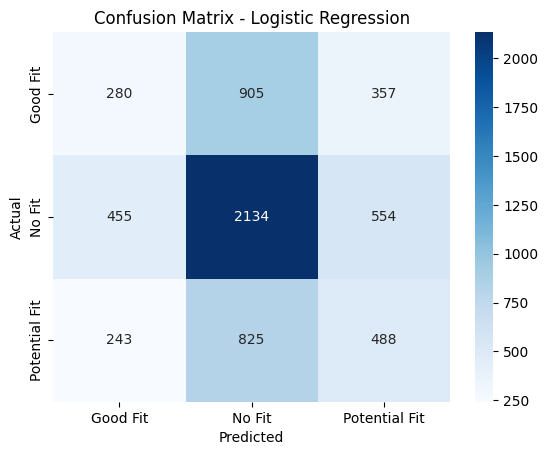


Evaluating Random Forest...
Accuracy: 0.9385
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1542
           1       0.93      0.96      0.95      3143
           2       0.95      0.90      0.92      1556

    accuracy                           0.94      6241
   macro avg       0.94      0.93      0.94      6241
weighted avg       0.94      0.94      0.94      6241



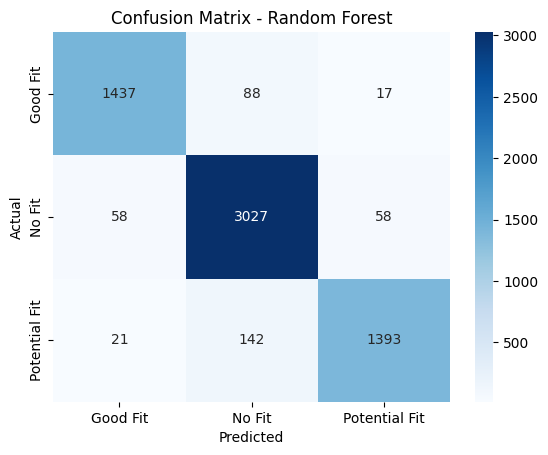


Evaluating Decision Tree...
Accuracy: 0.9390
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1542
           1       0.93      0.97      0.95      3143
           2       0.98      0.87      0.92      1556

    accuracy                           0.94      6241
   macro avg       0.94      0.93      0.94      6241
weighted avg       0.94      0.94      0.94      6241



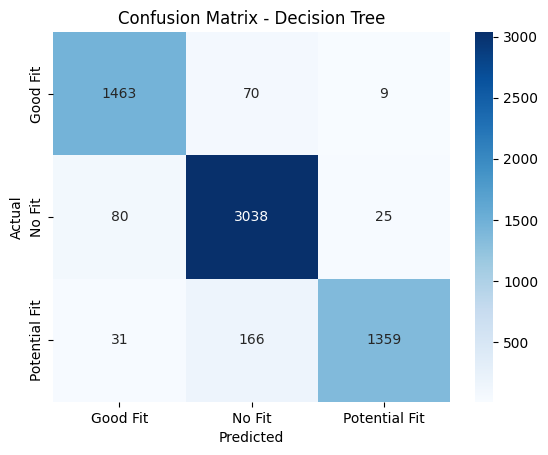


Evaluating AdaBoost...
Accuracy: 0.4560
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.52      0.41      1542
           1       0.63      0.48      0.54      3143
           2       0.38      0.35      0.36      1556

    accuracy                           0.46      6241
   macro avg       0.45      0.45      0.44      6241
weighted avg       0.49      0.46      0.46      6241



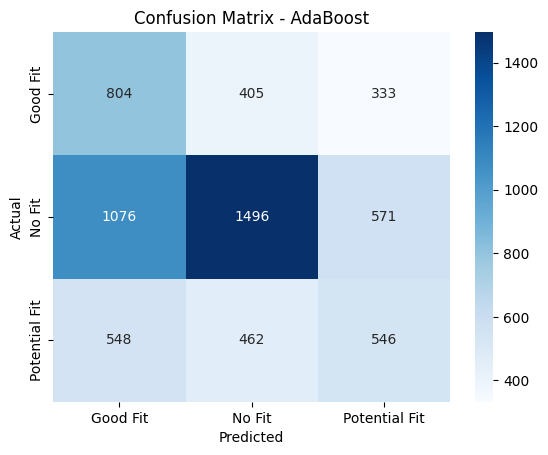


Evaluating XGBoost...
Accuracy: 0.8545
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1542
           1       0.88      0.88      0.88      3143
           2       0.82      0.81      0.81      1556

    accuracy                           0.85      6241
   macro avg       0.85      0.85      0.85      6241
weighted avg       0.85      0.85      0.85      6241



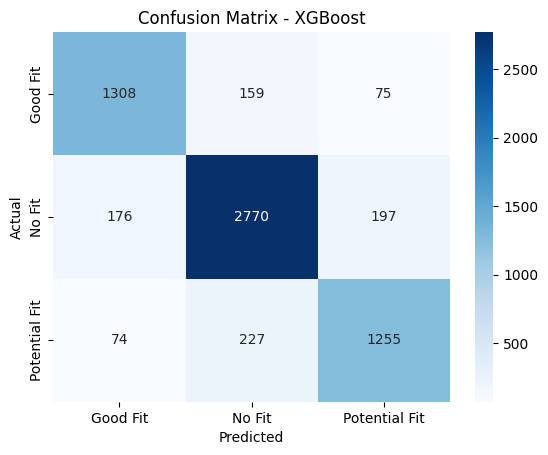

In [31]:
# Evaluate models
for name, model in best_models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Save the best models

In [45]:
with open("best_models.pkl", "wb") as f:
    pickle.dump(best_models, f)

# Final model Desion tree with out standard scaler 

In [15]:
with open("decision_tree.pkl", "wb") as f:
    pickle.dump(best_models["Decision Tree"], f)

# Load the .pkl file

In [32]:
with open('decision_tree.pkl', 'rb') as f:
    decision_tree = pickle.load(f)